### Score: `[48]`

1.1 `[14]` Good job! 注意gama参数

1.2 `[19]` Good job!

1.3 `[5]` Good job!

[Bonus] `[10]` Good job!

各题批注用`### Note`给出，请自行查阅。

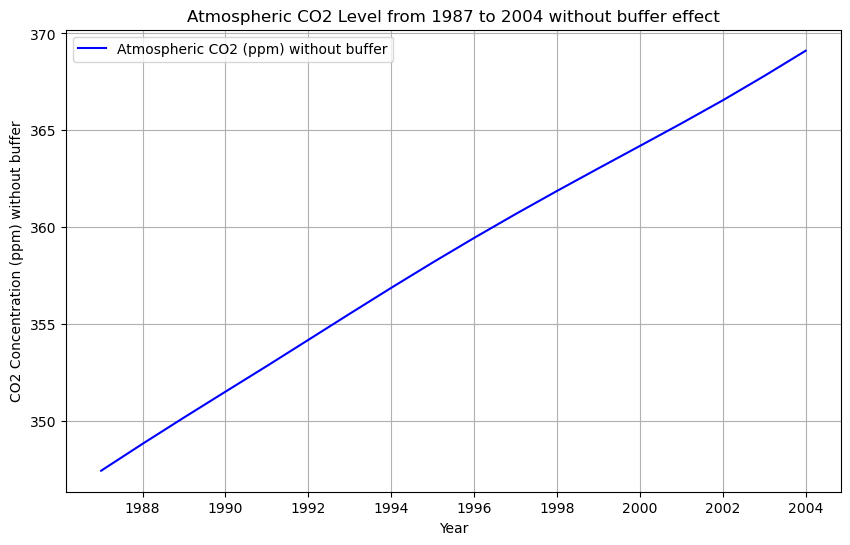

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.ticker import MaxNLocator

# 1.1
# 定义参数
# 从大气到海洋表面的碳转移系数
k12 = 105 / 740
# 从海洋表面到大气的碳转移系数
k21 = 102 / 900
# 化石燃料燃烧产生的CO2排放率（PgC/年）
Q_pg = 6.0 # 该参数从global.1751_2008.csv中读取并转换，下一题同理

# 初始条件
# 1986年大气中的碳含量（PgC）
N1_initial_pg = 740
# 1986年海洋表面的碳含量（PgC）
N2_initial_pg = 900

# 转换为ppm
N1_initial_ppm = N1_initial_pg / 2.13
N2_initial_ppm = N2_initial_pg / 2.13
Q_ppm = Q_pg / 2.13

# 定义微分方程
def co2_model_without_buffer(t, y):
    N1, N2 = y
    dN1_dt = -k12 * N1 + k21 * N2 + Q_ppm
    dN2_dt = k12 * N1 - k21 * N2
    return [dN1_dt, dN2_dt]

# 时间范围
years = np.arange(1987, 2005)
# 时间跨度
t_span = (0, len(years) - 1)
# 初始条件
y0 = [N1_initial_ppm, N2_initial_ppm]

# 求解微分方程
#solution = solve_ivp(co2_model_without_buffer, t_span, y0, t_eval=np.arange(len(years)))
solution_without_buffer = solve_ivp(co2_model_without_buffer, t_span, y0, t_eval=np.arange(len(years)))
# 获取结果
N1_values_without_buffer = solution_without_buffer.y[0]

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(years, N1_values_without_buffer, label='Atmospheric CO2 (ppm) without buffer', color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm) without buffer')
plt.title('Atmospheric CO2 Level from 1987 to 2004 without buffer effect')

# 设置横坐标刻度为整数
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend()
plt.grid(True)
plt.show()

1987年的CO2浓度: 347.42 ppm
1988年的CO2浓度: 371.01 ppm
1989年的CO2浓度: 379.41 ppm
1990年的CO2浓度: 383.60 ppm
1991年的CO2浓度: 386.50 ppm
1992年的CO2浓度: 389.23 ppm
1993年的CO2浓度: 391.76 ppm
1994年的CO2浓度: 394.43 ppm
1995年的CO2浓度: 396.85 ppm
1996年的CO2浓度: 399.54 ppm
1997年的CO2浓度: 402.19 ppm
1998年的CO2浓度: 404.36 ppm
1999年的CO2浓度: 407.24 ppm
2000年的CO2浓度: 409.70 ppm
2001年的CO2浓度: 412.21 ppm
2002年的CO2浓度: 414.98 ppm
2003年的CO2浓度: 417.23 ppm
2004年的CO2浓度: 419.97 ppm


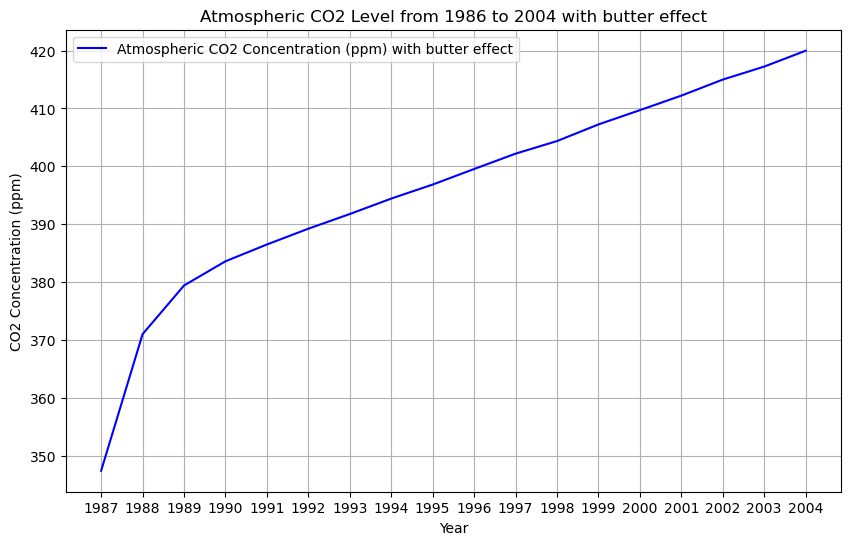

In [115]:
#1.2
# 定义参数（单位转换为PgC）
# 大气中的CO2浓度（PgC）
N1_initial_pg = 740
# 海洋中的CO2浓度（PgC）
N2_initial_pg = 900
# 海洋的平衡碳浓度（PgC）
N2_prime_pg = 821
# 化石燃料燃烧产生的CO2排放率（PgC/年）
Q_pg = 6.0

# 转换为ppm
N1_initial_ppm = N1_initial_pg / 2.13
N2_initial_ppm = N2_initial_pg / 2.13
N2_prime_ppm = N2_prime_pg / 2.13
Q_ppm = Q_pg / 2.13

# 模型参数
# 从大气到海洋的转移系数
k12 = 105 / 740
# 从海洋到大气的转移系数
k21 = 102 / 900

# 定义微分方程
def co2_model_with_buffer(t, y):
    N1, N2 = y
    # 添加缓冲因子
    buffer_factor = 3.69 + 1.86e-2 * N1 - 1.8e-6 * N1**2
    dN1_dt = -k12 * N1 + k21 * (N2_prime_ppm + buffer_factor * (N2 - N2_prime_ppm)) + Q_ppm
    dN2_dt = k12 * N1 - k21 * (N2_prime_ppm + buffer_factor * (N2 - N2_prime_ppm))
    return [dN1_dt, dN2_dt]

# 时间范围
years = np.arange(1987, 2005)
# 时间跨度
t_span = (0, len(years) - 1)
# 初始条件
y0_buffer= [N1_initial_ppm, N2_initial_ppm]

# 求解微分方程
solution_with_buffer= solve_ivp(co2_model_with_buffer, t_span, y0_buffer, t_eval=np.arange(len(years)))

# 获取结果
N1_values_with_buffer= solution_with_buffer.y[0]

# 打印每一年的CO2浓度
for year, concentration in zip(years, N1_values_with_buffer):
    print(f"{year}年的CO2浓度: {concentration:.2f} ppm")

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(years, N1_values_with_buffer, label='Atmospheric CO2 Concentration (ppm) with butter effect', color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Level from 1986 to 2004 with butter effect')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 这里我寻求我的师姐龙师倩找到了观测值数据
import pandas as pd
ob=pd.read_csv('co2_annmean_mlo.csv')
ob

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


Text(1995, 354.176089071327, 'calculation without buffer effect')

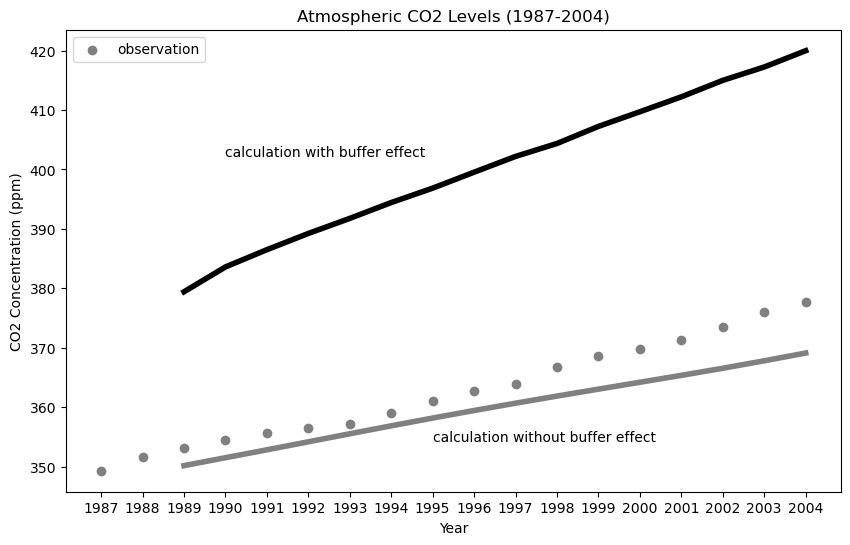

In [107]:
#1.3
plt.figure(figsize=(10, 6))
plt.plot(years[2:], N1_values_with_buffer[2:], linewidth = 4, color='black')
plt.plot(years[2:], N1_values_without_buffer[2:], linewidth = 4, color='gray')
plt.scatter(ob['year'][28:46], ob['mean'][28:46], label='observation', color='gray')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Levels (1987-2004)')
plt.xticks(years)
plt.legend()
#调整图例的位置
plt.text(years[-15], N1_values_with_buffer[-8], 'calculation with buffer effect', color='black')
plt.text(years[-10], N1_values_without_buffer[-13], 'calculation without buffer effect', color='black')

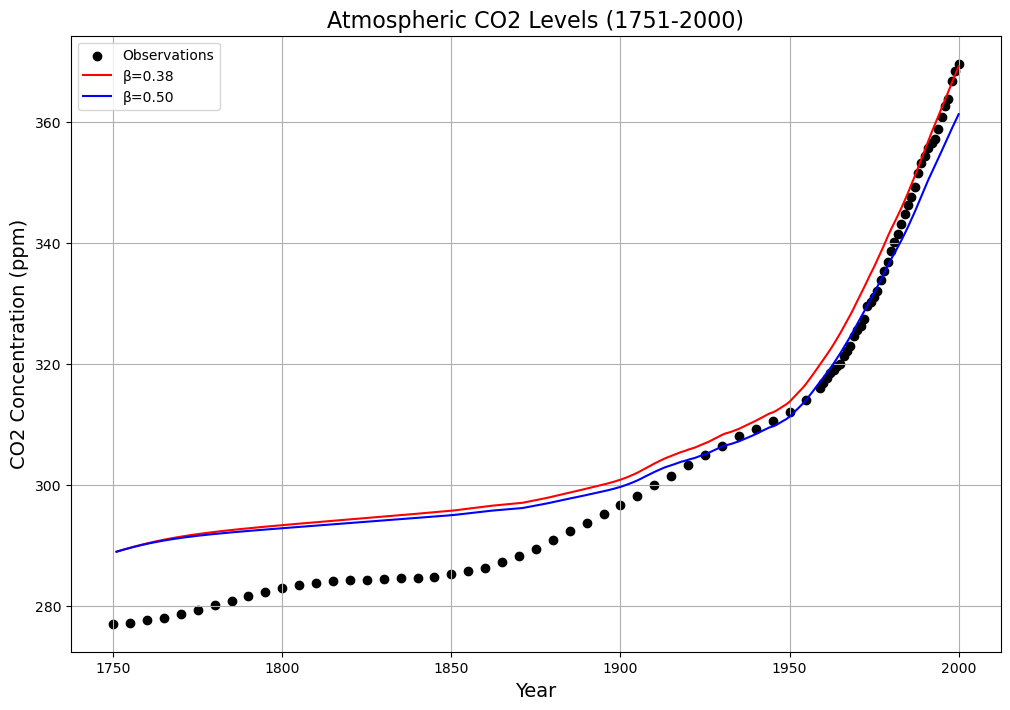

In [25]:
#bouns
CO2_Ob = pd.read_csv('1750-2000CO2.csv')
Global_land_use = pd.read_excel('Global_land-use_flux-1750_2005.xls')
global_emissions = pd.read_csv('global.1751_2014.csv')

# 处理土地利用数据
Global_land_use = Global_land_use[['Year', 'Global']]
Global_land_use['LandUseChange'] = Global_land_use['Global'] / (1000 * 2.13)

# 处理化石燃料排放数据
global_emissions = global_emissions[['Year', 
                                      'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)', 
                                      'Carbon emissions from cement production']]
global_emissions['FossilFuelEmissions'] = global_emissions.iloc[:, 1] - global_emissions.iloc[:, 2]
global_emissions['EmissionFactor'] = global_emissions['FossilFuelEmissions'] / (1000 * 2.13)

# 定义传输系数
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1238 ### Note: 应为1328

# 初始条件（ppm）
N1_0 = 615 / 2.13
N2_0 = 842 / 2.13
N3_0 = 9744 / 2.13
N4_0 = 26280 / 2.13
N5_0 = 90000000 / 2.13
N6_0 = 731 / 2.13
N7_0 = 1238 / 2.13

# 设定 f0 和 P0
f0 = 62 / 2.13
P0 = 615 / 2.13

# 时间范围
years = np.arange(1751, 2001)

# 设定 beta 值
beta_values = [0.38, 0.5]
results = []

# 计算 CO2 浓度
for beta in beta_values:
    N1, N2, N3, N4, N5, N6, N7 = N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0
    atmosphere = []

    for year in years:
        gamma = global_emissions[global_emissions['Year'] == year]['EmissionFactor'].values[0]
        delta = Global_land_use[Global_land_use['Year'] == year]['LandUseChange'].values[0]

        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2
        f = f0 * (1 + beta * np.log(N1 / P0))

        # 计算每个部分的变化率
        dN1_dt = (-k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7)
        dN2_dt = (k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2)
        dN3_dt = (k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4)
        dN4_dt = (k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4)
        dN5_dt = (k45 * N4 - k51 * N5)
        dN6_dt = (f - k67 * N6 - 2 * delta)
        dN7_dt = (k67 * N6 - k71 * N7 + delta)

        # 更新每个部分的值
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt

        atmosphere.append(N1)

    results.append(atmosphere)

# 绘制结果
plt.figure(figsize=(12, 8))
plt.scatter(CO2_Ob['year'], CO2_Ob['mean'], label='Observations', color='black')
plt.plot(years, results[0], color='red', label='β=0.38')
plt.plot(years, results[1], color='blue', label='β=0.50')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Atmospheric CO2 Levels (1751-2000)', fontsize=16)
plt.legend()
plt.grid()
plt.show()